In [1]:
import json
import matplotlib.pyplot as plt
import os
from glob import glob

In [2]:
def plot(file_name:str):
    print(file_name)
    # Define the percentiles and metric prefixes
    percentiles = ["p25", "p50", "p75", "p90", "p95", "p99"]
    metrics = {
        "Inter-token latency (s)": "results_inter_token_latency_s_quantiles_",
        "TTFT (s)": "results_ttft_s_quantiles_",
        "End-to-end latency (s)": "results_end_to_end_latency_s_quantiles_"
    }

    # Prepare storage for extracted data
    data = {metric: {} for metric in metrics}

    with open(file_name) as f:
        summary = json.load(f)
        label = os.path.basename(os.path.dirname(file_name))  # Use the parent folder name as label
        for metric, prefix in metrics.items():
            data[metric][label] = [summary[f"{prefix}{p}"] for p in percentiles]

    # Plotting
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
    x = range(len(percentiles))

    for ax, (metric, values) in zip(axes, data.items()):
        for label, y in values.items():
            ax.plot(x, y, marker='o', color='red', label=label)
        ax.set_title(metric)
        ax.set_xticks(x)
        ax.set_xticklabels(percentiles)
        ax.set_ylabel("Seconds")
        ax.legend(fontsize="small", loc="upper left", bbox_to_anchor=(1, 1))
        ax.grid(True)

    plt.tight_layout()
    plt.show()

In [3]:
# Find all summary.json files
summary_files = sorted(glob("result_outputs/*summary.json", recursive=True))

result_outputs/A100_ModelCloud-DeepSeek-R1-Distill-Qwen-7B-gptqmodel-4bit-vortex-v2_250_75_summary.json


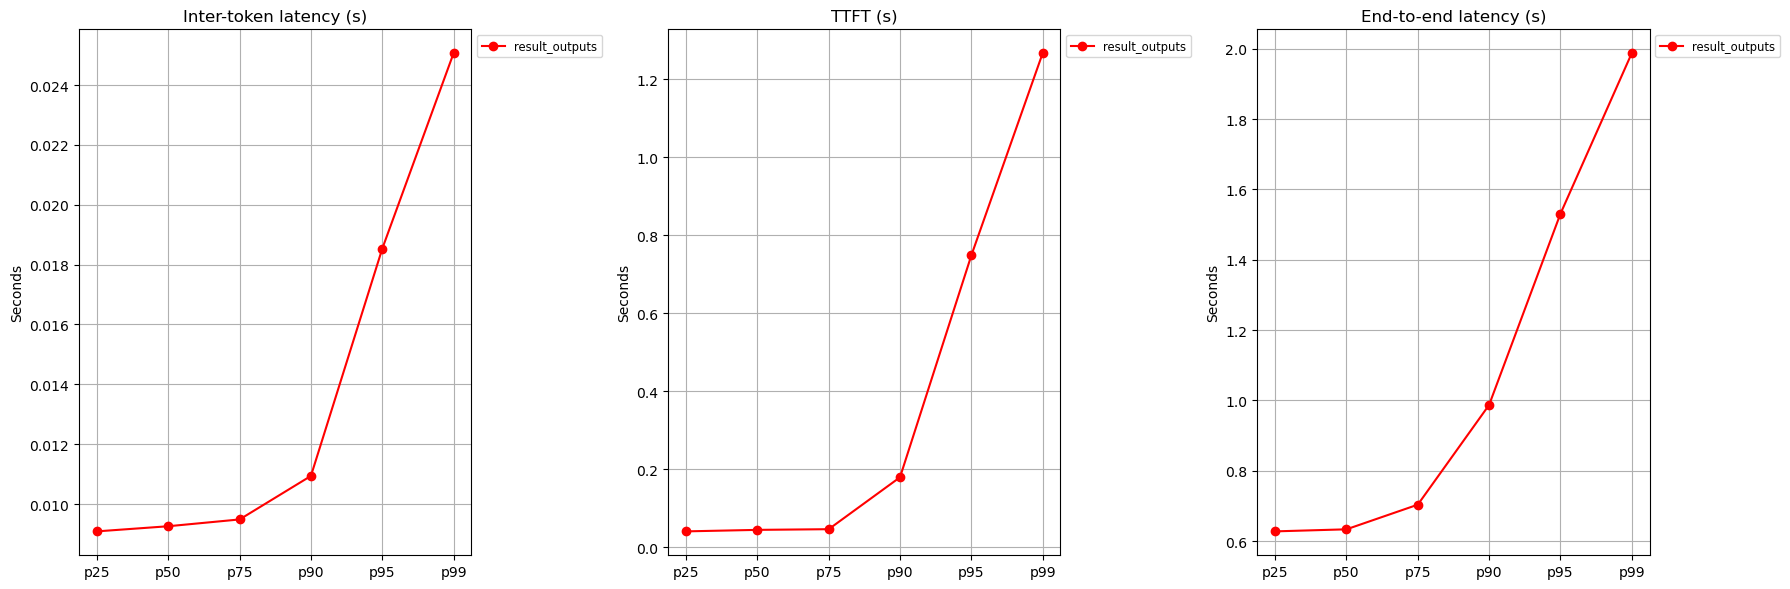

result_outputs/V100_ModelCloud-DeepSeek-R1-Distill-Qwen-7B-gptqmodel-4bit-vortex-v2_250_75_summary.json


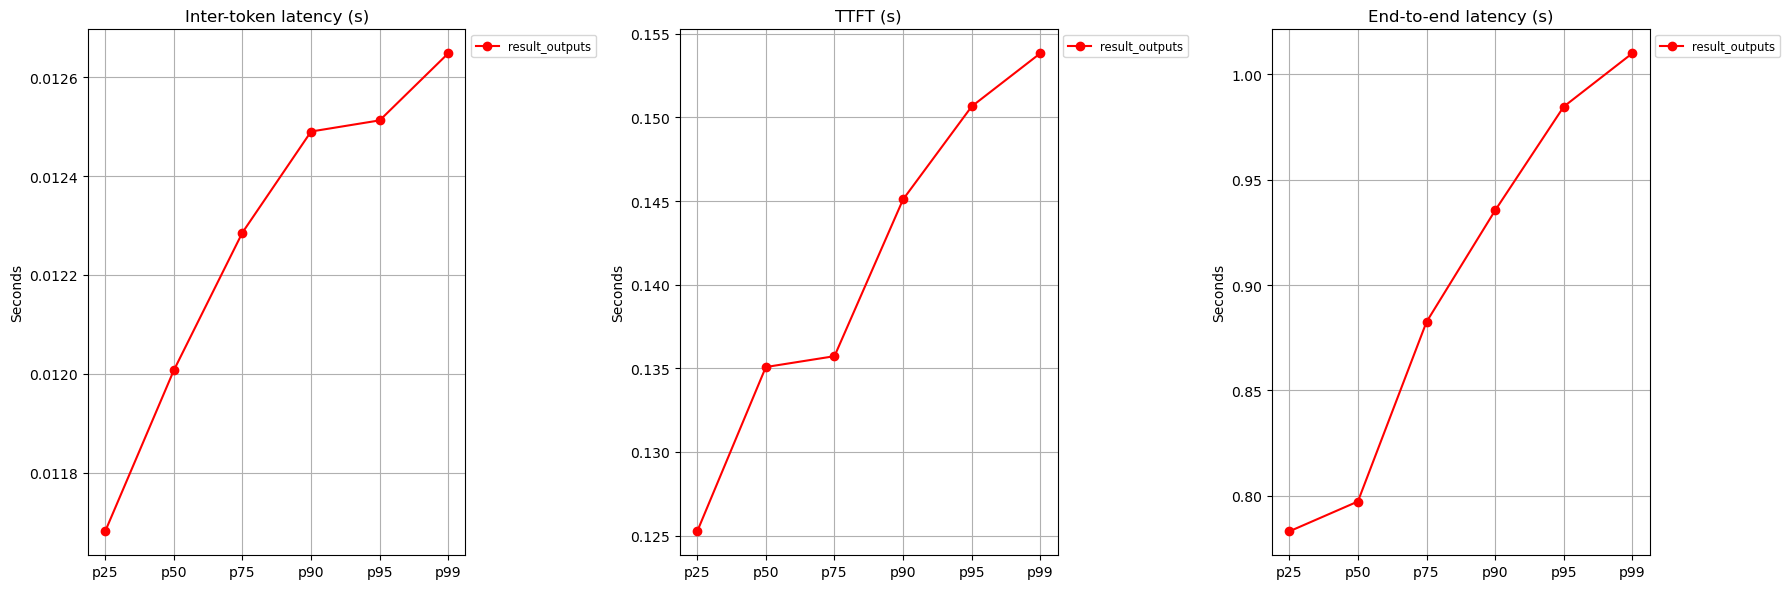

In [4]:
for file in summary_files:
    plot(file)